# Movies Reviews Sentiment Analysis

Intentamos seguir los lineamientos del analisis realizado en clase.

### Carga Dataset

In [1]:
%load_ext autoreload
%autoreload 2
# Cargamos el dataset
from util import load_datasets_unlabeled_test
train, dev, test = load_datasets_unlabeled_test(test_size_val=0.2) # en realidad dev_size_val
X_train, y_train = train
X_dev, y_dev = dev
X_test=test  # No tenemos el correspondiente y_test

## Analisis Preliminar

### CountVectorizer + LinearSVC 
#### CountVectorizer()

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
#Armamos el pipeline con valores por defecto
vect=CountVectorizer()
clf=LinearSVC(random_state=0)
pipeline = Pipeline([
    ('vect', vect),
    ('clf', clf),
])
# Fit on train usando el pipe= feature transformer + estimator 
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip..., max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0))])

Train using <class 'sklearn.svm.classes.LinearSVC'>
Reporte de clasificación: 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       419
          1       1.00      1.00      1.00       437

avg / total       1.00      1.00      1.00       856





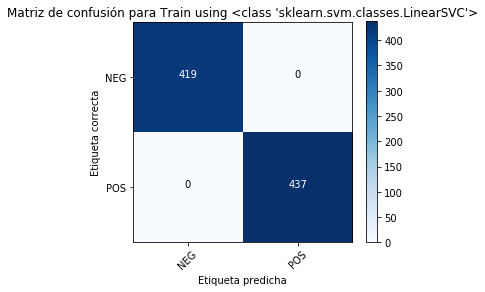

Dev using <class 'sklearn.svm.classes.LinearSVC'>
Reporte de clasificación: 

             precision    recall  f1-score   support

          0       0.78      0.89      0.83       116
          1       0.84      0.70      0.77        98

avg / total       0.81      0.80      0.80       214





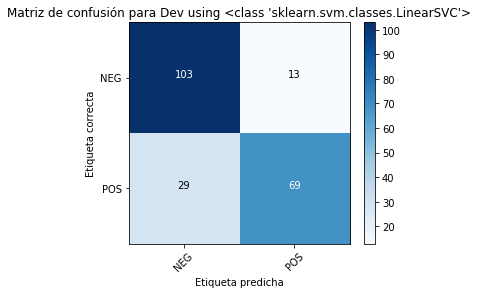

In [3]:
# Veamos que resulto del ajuste con valores por default
from util import print_plot_classification_report
#
est=str(pipeline.steps[-1][1].__class__)
# Train
print_plot_classification_report(pipeline,X_train,y_train,'Train using ' + est,plotFlag=True,classes_list=['NEG','POS'])
# Dev
print_plot_classification_report(pipeline,X_dev,y_dev,'Dev using ' + est,plotFlag=True,classes_list=['NEG','POS'])

#### CountVectorizer(binary=True)

Dev using <class 'sklearn.svm.classes.LinearSVC'>
Reporte de clasificación: 

             precision    recall  f1-score   support

          0       0.82      0.85      0.84       116
          1       0.82      0.79      0.80        98

avg / total       0.82      0.82      0.82       214





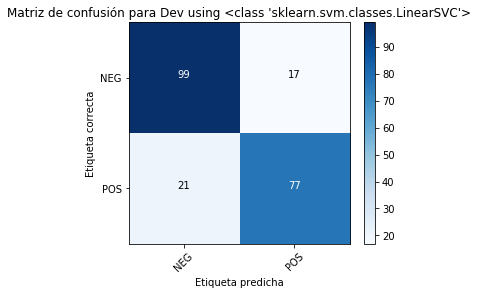

In [4]:
# CountVectorizer binary=True
vect=CountVectorizer(binary=True)
clf=LinearSVC(random_state=0)
pipeline = Pipeline([
    ('vect', vect),
    ('clf', clf),
])
pipeline.fit(X_train, y_train)
# Dev
print_plot_classification_report(pipeline,X_dev,y_dev,'Dev using ' + est,plotFlag=True,classes_list=['NEG','POS'])

Vemos que en forma similar al analisis de clase la modificacion de uno de los parametros de CountVectorizer ya otorga una mejora en "dev" 

### TfidfVectorizer + LinearSVC 
#### TfidfVectorizer()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
#
vect = TfidfVectorizer()
clf=LinearSVC(random_state=0)
#Armamos el pipeline con valores por defecto
pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVC(random_state=0)),
])
# Fit on train usando el pipe= feature transformer + estimator 
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ..., max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0))])

Train using <class 'sklearn.svm.classes.LinearSVC'>
Reporte de clasificación: 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       419
          1       1.00      1.00      1.00       437

avg / total       1.00      1.00      1.00       856





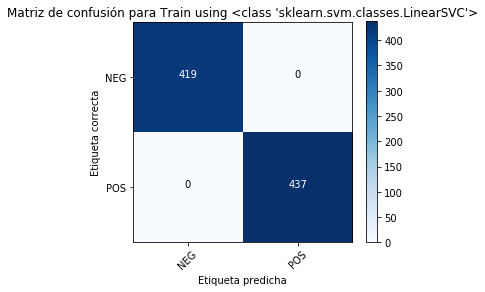

Dev using <class 'sklearn.svm.classes.LinearSVC'>
Reporte de clasificación: 

             precision    recall  f1-score   support

          0       0.90      0.90      0.90       116
          1       0.88      0.88      0.88        98

avg / total       0.89      0.89      0.89       214





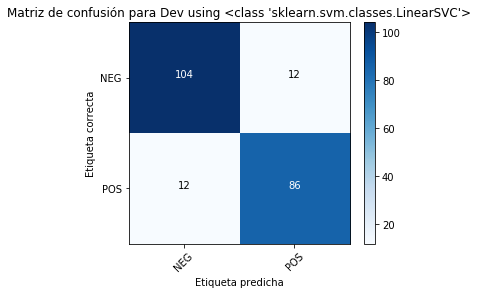

In [6]:
est=str(pipeline.steps[-1][1].__class__)
# Train
print_plot_classification_report(pipeline,X_train,y_train,'Train using ' + est,plotFlag=True,classes_list=['NEG','POS'])
# Dev
print_plot_classification_report(pipeline,X_dev,y_dev,'Dev using ' + est,plotFlag=True,classes_list=['NEG','POS'])

Observamos que este TfidfVectorizer tiene mejor performance en dev que CountVectorizer (usando valores default)

#### TfidfVectorizer(binary=True)

In [7]:
#
vect = TfidfVectorizer(binary=True)
clf=LinearSVC(random_state=0)
#Armamos el pipeline con valores por defecto
pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVC(random_state=0)),
])
# Fit on train usando el pipe= feature transformer + estimator 
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
   ..., max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0))])

Train using <class 'sklearn.svm.classes.LinearSVC'>
Reporte de clasificación: 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       419
          1       1.00      1.00      1.00       437

avg / total       1.00      1.00      1.00       856





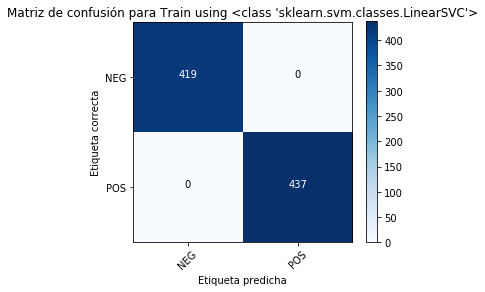

Dev using <class 'sklearn.svm.classes.LinearSVC'>
Reporte de clasificación: 

             precision    recall  f1-score   support

          0       0.88      0.83      0.85       116
          1       0.81      0.87      0.84        98

avg / total       0.85      0.85      0.85       214





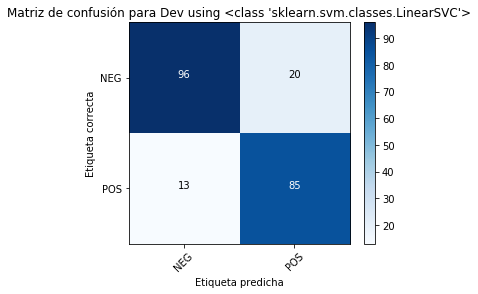

In [8]:
est=str(pipeline.steps[-1][1].__class__)
# Train
print_plot_classification_report(pipeline,X_train,y_train,'Train using ' + est,plotFlag=True,classes_list=['NEG','POS'])
# Dev
print_plot_classification_report(pipeline,X_dev,y_dev,'Dev using ' + est,plotFlag=True,classes_list=['NEG','POS'])

Observamos que este TfidfVectorizer empeora su performance en dev al utilizar binary=True (aun asi sigue otorgando mejores resultados que Countvectorizer).

Ahora que ya realizamos algunas iteraciones probemos con otros estimadores.

#### Clasificadores

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier

clfs = [
    KNeighborsClassifier(),
    MultinomialNB(),
    DecisionTreeClassifier(random_state=0),
    LogisticRegression(random_state=0),
    LinearSVC(random_state=0),
    SVC(random_state=0),
    RandomForestClassifier(random_state=0),
]

#### CountVectorizer
Vimos que para el caso de la LinearSVC, binary=True (para CountVectorizer) otorgaba mejoras en la clasificacion.

In [10]:
from util import print_short_eval
# Vimos que en el caso anterior
vect = CountVectorizer(binary=True)

for clf in clfs:
    print(str(clf.__class__))
    pipeline = Pipeline([
        ('vect', vect),
        ('clf', clf),
    ])
    pipeline.fit(X_train, y_train)
    print_short_eval(pipeline, X_train, y_train)
    print_short_eval(pipeline, X_dev, y_dev)

<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
accuracy	0.73	macro f1	0.72
accuracy	0.59	macro f1	0.52
<class 'sklearn.naive_bayes.MultinomialNB'>
accuracy	0.98	macro f1	0.98
accuracy	0.84	macro f1	0.84
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
accuracy	1.00	macro f1	1.00
accuracy	0.68	macro f1	0.68
<class 'sklearn.linear_model.logistic.LogisticRegression'>
accuracy	1.00	macro f1	1.00
accuracy	0.84	macro f1	0.84
<class 'sklearn.svm.classes.LinearSVC'>
accuracy	1.00	macro f1	1.00
accuracy	0.82	macro f1	0.82
<class 'sklearn.svm.classes.SVC'>


/home/felix/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy	0.51	macro f1	0.34
accuracy	0.46	macro f1	0.31
<class 'sklearn.ensemble.forest.RandomForestClassifier'>
accuracy	0.99	macro f1	0.99
accuracy	0.74	macro f1	0.74


#### TfidfVectorizer
Vimos que para el caso de la LinearSVC, binary=False (para TfidfVectorizer) otorgaba mejoras en la clasificacion. Igualmente en esta situacion vamos a probar las dos intancias.

In [11]:
#
vect = TfidfVectorizer()
for clf in clfs:
    print(str(clf.__class__))
    pipeline = Pipeline([
        ('vect', vect),
        ('clf', clf),
    ])
    pipeline.fit(X_train, y_train)
    print_short_eval(pipeline, X_train, y_train)
    print_short_eval(pipeline, X_dev, y_dev)

<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
accuracy	0.71	macro f1	0.70
accuracy	0.66	macro f1	0.61
<class 'sklearn.naive_bayes.MultinomialNB'>
accuracy	0.98	macro f1	0.98
accuracy	0.86	macro f1	0.85
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
accuracy	1.00	macro f1	1.00
accuracy	0.62	macro f1	0.61
<class 'sklearn.linear_model.logistic.LogisticRegression'>
accuracy	0.96	macro f1	0.96
accuracy	0.84	macro f1	0.84
<class 'sklearn.svm.classes.LinearSVC'>
accuracy	1.00	macro f1	1.00
accuracy	0.89	macro f1	0.89
<class 'sklearn.svm.classes.SVC'>


/home/felix/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy	0.51	macro f1	0.34
accuracy	0.46	macro f1	0.31
<class 'sklearn.ensemble.forest.RandomForestClassifier'>
accuracy	0.99	macro f1	0.99
accuracy	0.66	macro f1	0.65


In [12]:
print('TfidfVectorizer(binary=True)')
vect = TfidfVectorizer(binary=True)
for clf in clfs:
    print(str(clf.__class__))
    pipeline = Pipeline([
        ('vect', vect),
        ('clf', clf),
    ])
    pipeline.fit(X_train, y_train)
    print_short_eval(pipeline, X_train, y_train)
    print_short_eval(pipeline, X_dev, y_dev)

TfidfVectorizer(binary=True)
<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
accuracy	0.85	macro f1	0.85
accuracy	0.78	macro f1	0.77
<class 'sklearn.naive_bayes.MultinomialNB'>
accuracy	0.99	macro f1	0.99
accuracy	0.86	macro f1	0.85
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
accuracy	1.00	macro f1	1.00
accuracy	0.67	macro f1	0.67
<class 'sklearn.linear_model.logistic.LogisticRegression'>
accuracy	0.99	macro f1	0.99
accuracy	0.85	macro f1	0.85
<class 'sklearn.svm.classes.LinearSVC'>
accuracy	1.00	macro f1	1.00
accuracy	0.85	macro f1	0.85
<class 'sklearn.svm.classes.SVC'>


/home/felix/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy	0.51	macro f1	0.34
accuracy	0.46	macro f1	0.31
<class 'sklearn.ensemble.forest.RandomForestClassifier'>
accuracy	0.99	macro f1	0.99
accuracy	0.71	macro f1	0.69


#### Comentarios
Del analisis preliminar anterior observamos que independiente del feature_extractor (Countvectorizer o TfidfVectorizer) tres clasificadores se mantienen en mayor o menor medida
- LinearSVC
- LogisticRegression
- MultinomialNB

Asique vamos a seguir adelante con una busqueda parametrica para intentar quedarnos con un set mas reducido de clasificadores. A cada analisis en su notebook respectivo.